# ml-2019fall-hw1-Presentation

## Packages

* GPU tools
    - Tensorflow 1.x
* 畫圖 
    - Seaborn 
    - matplotlib
* 其他工具
    - sklearn
    - pandas
    - numpy

In [1]:
import os
import sys
import time 
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.kernel_approximation import Nystroem

os.environ["CUDA_VISIBLE_DEVICES"] = '0'

/home/smog70151/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/smog70151/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/smog70151/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/smog70151/anaconda3/lib/python3.7/site-packages/tensorflow/python/f

## Utilities
* preprocess(Observation)
    1. Load datas
    2. Use regular expression to extract datas 
    3. Replace NaN
    4. Reshape Data
* validation
    - remove some useless datas
* data_iter 
    - batch 
* plot_weights
    - visiable tools in order to select good features

In [2]:
def Preprocess_OBS(srcData, observation):
    data = srcData
    data = data[data['測項']==observation].ix[:,2:]
    col_names = data.columns.values.tolist()
    for col_name in col_names:
        data[col_name] = data[col_name].str.extract('([0-9]+\.[0-9]+|[0-9]+)')
    data.fillna(value=0, inplace=True)
    data = np.array(data).flatten()
    data = data.reshape(1, -1)
    return data

def Data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = np.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j, axis=0), labels.take(j, axis=0)
        
def Validation(x, y):
    if y <= 0 or y > 100:
        return False
    for i in range(9):
        if x[9,i] <= 0 or x[9,i] > 100:
            return False
    return True

def Plot_weight(srcWeights):
    try:
        w_map = srcWeights.reshape(-1, 9)
        f,ax = plt.subplots(figsize=(15,10))
        sns.heatmap(w_map, annot=True)
    except:
        pass
#         sns.heatmap(w_map, annot=True, yticklabels=label_names)

In [3]:
data0 = pd.read_csv('./year1-data.csv')
data1 = pd.read_csv('./year2-data.csv')

frame = [data0, data1]
data = pd.concat(frame)
TEMP = Preprocess_OBS(data, 'AMB_TEMP')
CH4  = Preprocess_OBS(data, 'CH4')
CO   = Preprocess_OBS(data, 'CO')
NMHC = Preprocess_OBS(data, 'NMHC')
NO   = Preprocess_OBS(data, 'NO')
NO2  = Preprocess_OBS(data, 'NO2')
NOX  = Preprocess_OBS(data, 'NOx')
O3   = Preprocess_OBS(data, 'O3')
PM10 = Preprocess_OBS(data, 'PM10')
PM25 = Preprocess_OBS(data, 'PM2.5')
RAINFALL = Preprocess_OBS(data, 'RAINFALL')
RH  = Preprocess_OBS(data, 'RH')
SO2 = Preprocess_OBS(data, 'SO2')
THC = Preprocess_OBS(data, 'THC')
WD_HR = Preprocess_OBS(data, 'WD_HR')
WIND_DIREC = Preprocess_OBS(data, 'WIND_DIREC')
WIND_SPEED = Preprocess_OBS(data, 'WIND_SPEED')
WS_HR = Preprocess_OBS(data, 'WS_HR')

train_datas = np.concatenate((TEMP, CH4, CO, NMHC, NO, NO2,
                             NOX, O3, PM10, PM25, RAINFALL, RH,
                             SO2, THC, WD_HR, WIND_DIREC, WIND_SPEED, WS_HR), axis=0)

data = pd.read_csv('./testing_data.csv')
TEMP = Preprocess_OBS(data, 'AMB_TEMP')
CH4  = Preprocess_OBS(data, 'CH4')
CO   = Preprocess_OBS(data, 'CO')
NMHC = Preprocess_OBS(data, 'NMHC')
NO   = Preprocess_OBS(data, 'NO')
NO2  = Preprocess_OBS(data, 'NO2')
NOX  = Preprocess_OBS(data, 'NOx')
O3   = Preprocess_OBS(data, 'O3')
PM10 = Preprocess_OBS(data, 'PM10')
PM25 = Preprocess_OBS(data, 'PM2.5')
RAINFALL = Preprocess_OBS(data, 'RAINFALL')
RH  = Preprocess_OBS(data, 'RH')
SO2 = Preprocess_OBS(data, 'SO2')
THC = Preprocess_OBS(data, 'THC')
WD_HR = Preprocess_OBS(data, 'WD_HR')
WIND_DIREC = Preprocess_OBS(data, 'WIND_DIREC')
WIND_SPEED = Preprocess_OBS(data, 'WIND_SPEED')
WS_HR = Preprocess_OBS(data, 'WS_HR')
test_datas = np.concatenate((TEMP, CH4, CO, NMHC, NO, NO2,
                             NOX, O3, PM10, PM25, RAINFALL, RH,
                             SO2, THC, WD_HR, WIND_DIREC, WIND_SPEED, WS_HR), axis=0)

/home/smog70151/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


畫出 Covariance Matrix 比較何項 Feature 與 'PM 2.5' 較為相關，並以此挑選想要的 Features。

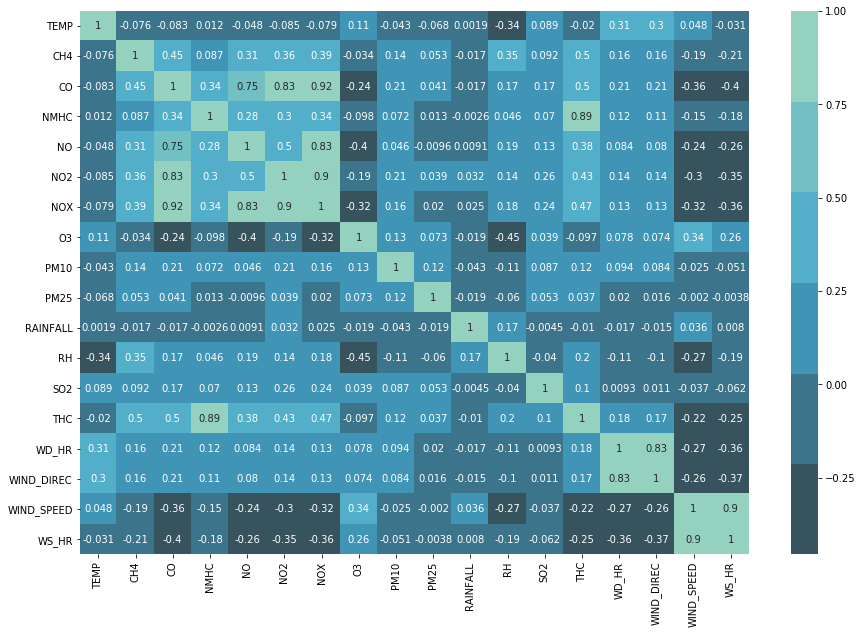

In [4]:
label_names = ['TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM25', 'RAINFALL', 'RH', 
               'SO2', 'THC', 'WD_HR', 'WIND_DIREC', 'WIND_SPEED', 'WS_HR']
color = sns.color_palette('GnBu_d')
train_datas = train_datas.astype('float')
cov = np.corrcoef(train_datas)
f,ax = plt.subplots(figsize=(15,10))
cov_heatmap = sns.heatmap(cov, annot=True, xticklabels=label_names, yticklabels=label_names, cmap=color)
fig = cov_heatmap.get_figure()
fileName = './report/hw1-cov_matrix.png'
fig.savefig(fileName)

將資料轉為 X_train, X_test, y_train。這邊有將每天的資料 concacate 在一起，用以增加資料量。

In [5]:
"""
    Initialize train_datas and train_labels  
"""

isInit = False 
train_data = None
train_label = None
data_size = None

## Total data nums 
nums = train_datas.shape[1] - 9


for hr in range(nums):
    isValid = Validation(train_datas[:, hr:hr+9].astype('float32'), train_datas[9:10, hr+9].astype('float32'))
    if isValid == True:
        if isInit == False:
            train_data = train_datas[:, hr:hr+9].flatten()
            data_size = train_data.shape[0]
            train_label = train_datas[9:10, hr+9]
            isInit = True
        else:
            train_data = np.concatenate((train_data, train_datas[:, hr:hr+9].flatten()))
            train_label = np.concatenate((train_label, train_datas[9:10, hr+9]))
            
train_data = train_data.astype('float32')
train_data = train_data.reshape(-1, data_size)
train_label = train_label.astype('float32')

## Save numpy
np.save('./workspace/train_datas.npy', train_data)
np.save('./workspace/train_labels.npy', train_label)

In [6]:
""" 
    Testing Data Feature 162
"""
isInit = False 
test_data = None 
data_size = None

## Total data nums 
days = int(test_datas.shape[1]//9)

for day in range(days): # 15 * 661 
    if isInit == False:
        test_data = test_datas[:, day*9:(day+1)*9].flatten()
        data_size = test_data.shape[0]
        isInit = True
    else:
        test_data = np.concatenate((test_data, test_datas[:, day*9:(day+1)*9].flatten()))
        

test_data = test_data.astype('float32')
test_data = test_data.reshape(-1, data_size)

1. 將 Training Set 切成 Traing & Validation 兩部分(2:1)。
2. 將資料做正規化。
-----
其他：
1. 利用 nystroem 將資料投影到任意維度。 

In [7]:
"""
    Main:
        1. Split into Train, Valid, and Test Three partitions
        2. Nomarlize the datas
    Others:
        1. Project to N-dims
"""

X_train, X_val, y_train, y_val = train_test_split(train_data, train_label, test_size=0.33, random_state=2019)
X_test = test_data

## Normalize
sc_x = StandardScaler()
sc_x.fit(X_train)

X_all_std = sc_x.transform(train_data)
X_train_std = sc_x.transform(X_train)
X_val_std = sc_x.transform(X_val)
X_test_std = sc_x.transform(X_test)

y_all_std = train_label
y_train_std = y_train
y_val_std = y_val

# Nystroem - N-dims
feature_map_nystroem = Nystroem(gamma=.2, random_state=1, n_components=324)
nystroem = feature_map_nystroem.fit(X_all_std)
X_all_nystroem = nystroem.transform(X_all_std)
X_train_nystroem = nystroem.transform(X_train_std)
X_val_nystroem = nystroem.transform(X_val_std)
X_test_nystroem = nystroem.transform(X_test_std)

* Model Selection
1. 透過訓練 model 及得到的 weights，將 features 縮減到 12-Dims。
2. 透過 PolynomialDegree 再進一步找出是否有遺漏的 features。
---
* Model Training 
1. Elastic Regularization
2. Gadient Clipping 
3. Loss - MAE 
    - Why MAE ? MAE -> Median 
    - Why MSE ? MSE -> Mean (If there r many weird data, MSE won't be a nice choice.)
---
* Other 
1. Draw train & valid loss figure

In [8]:
"""
    Parameters 
"""
lr = 1e-3
epochs = 25000
batch_size = 11326
input_size = X_train_std.shape[1]
regr_rate_l1 = tf.constant(5e-2)
regr_rate_l2 = tf.constant(5e-3)

Cur Round ->  (10754, 162)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


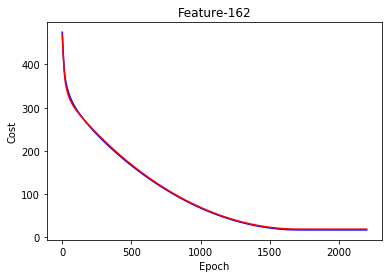

[Feature-162] R2 Score: 0.8574349028489494
Cur Round ->  (10754, 161)


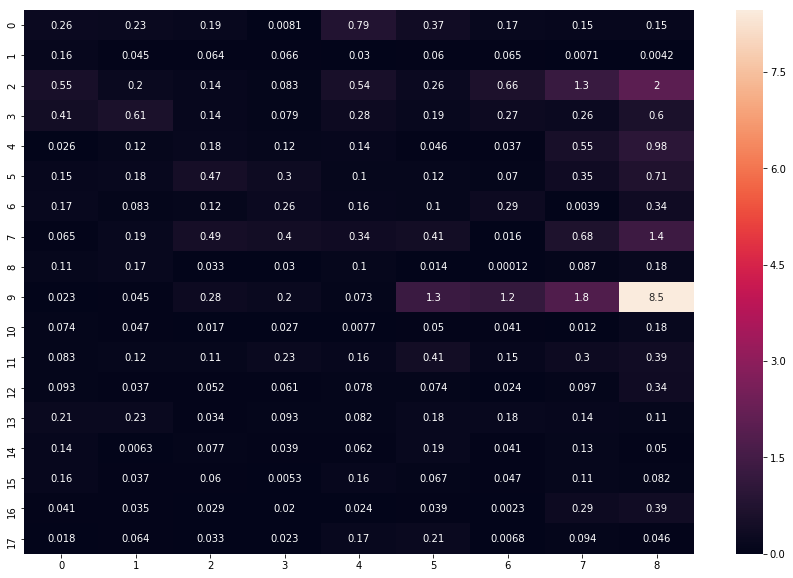

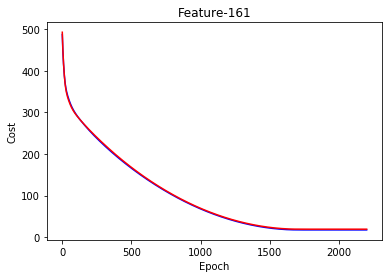

[Feature-161] R2 Score: 0.8574347619410043
Cur Round ->  (10754, 160)


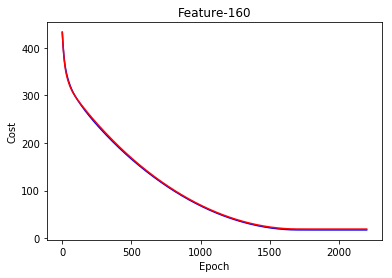

[Feature-160] R2 Score: 0.8574337198218719
Cur Round ->  (10754, 159)


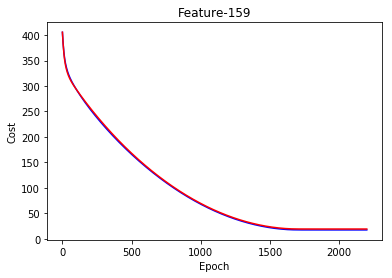

[Feature-159] R2 Score: 0.8574336371434158
Cur Round ->  (10754, 158)


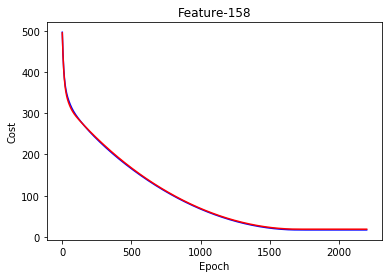

[Feature-158] R2 Score: 0.8574340274917343
Cur Round ->  (10754, 157)


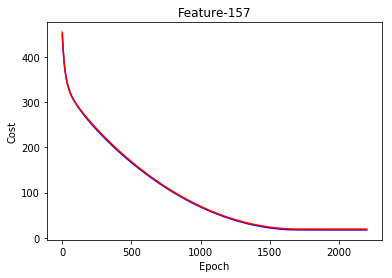

[Feature-157] R2 Score: 0.8574354422841975
Cur Round ->  (10754, 156)


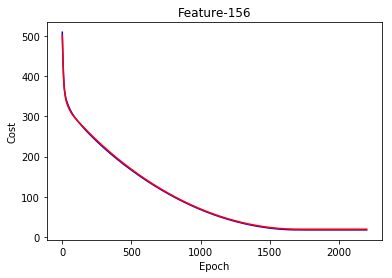

[Feature-156] R2 Score: 0.8574355892304223
Cur Round ->  (10754, 155)


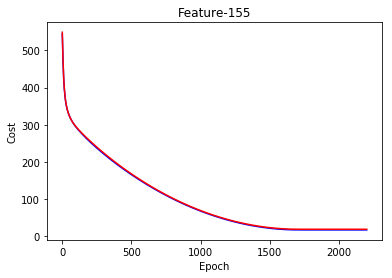

[Feature-155] R2 Score: 0.857435449536052
Cur Round ->  (10754, 154)


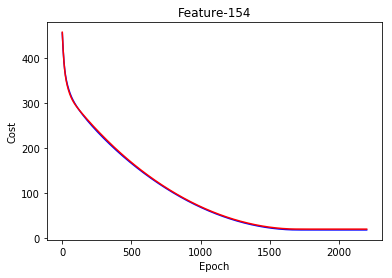

[Feature-154] R2 Score: 0.8574370317628056
Cur Round ->  (10754, 153)


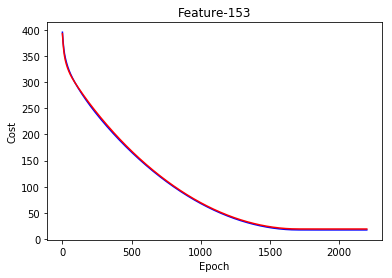

[Feature-153] R2 Score: 0.8574461495245921
Cur Round ->  (10754, 152)


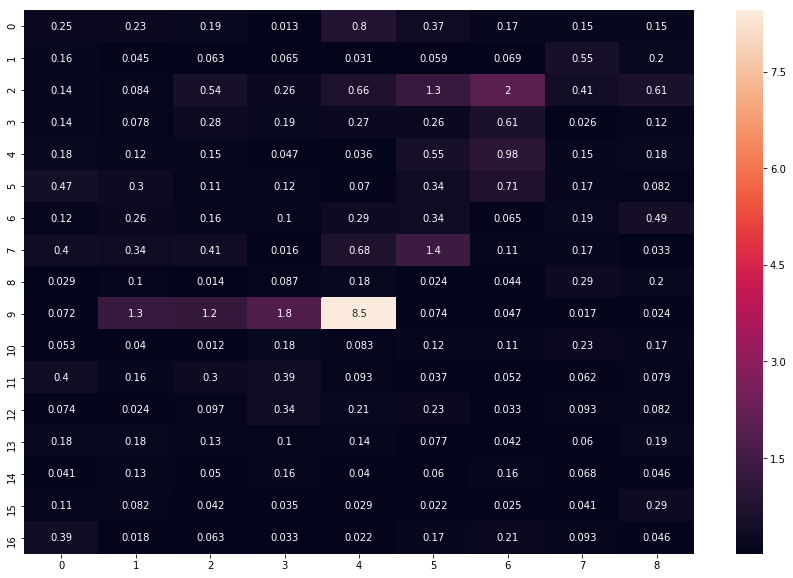

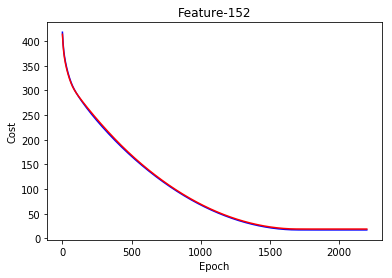

[Feature-152] R2 Score: 0.8574349055210596
Cur Round ->  (10754, 151)


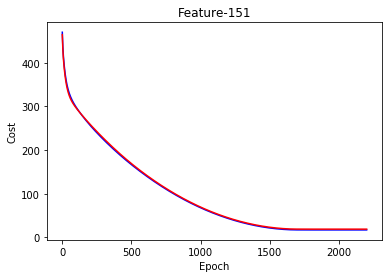

[Feature-151] R2 Score: 0.8574319980021129
Cur Round ->  (10754, 150)


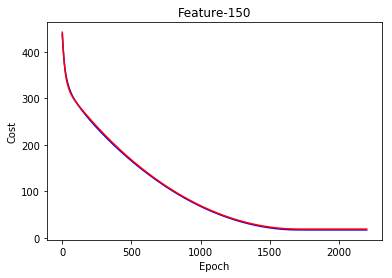

[Feature-150] R2 Score: 0.8574335219168934
Cur Round ->  (10754, 149)


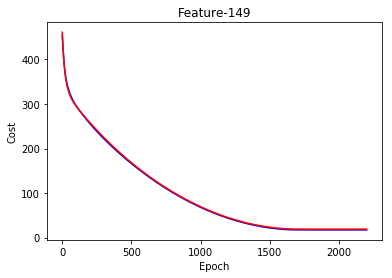

[Feature-149] R2 Score: 0.8574324862462153
Cur Round ->  (10754, 148)


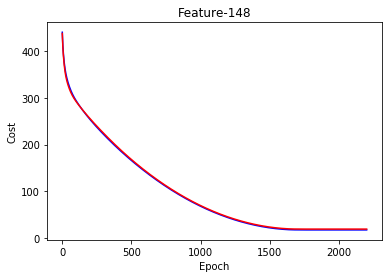

[Feature-148] R2 Score: 0.8574190246711695
Cur Round ->  (10754, 147)


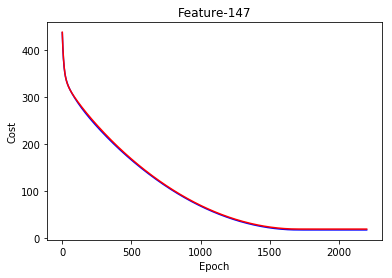

[Feature-147] R2 Score: 0.8574135900968335
Cur Round ->  (10754, 146)


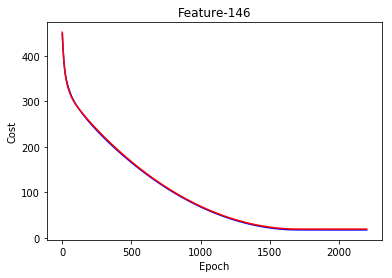

[Feature-146] R2 Score: 0.8573978284571561
Cur Round ->  (10754, 145)


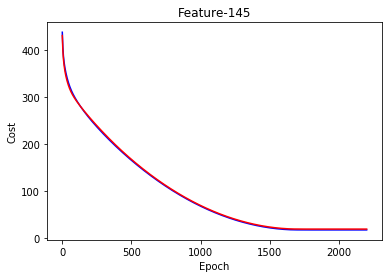

[Feature-145] R2 Score: 0.8573953955801026
Cur Round ->  (10754, 144)


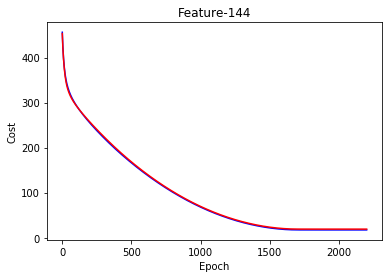

[Feature-144] R2 Score: 0.8574055115794235
Cur Round ->  (10754, 143)


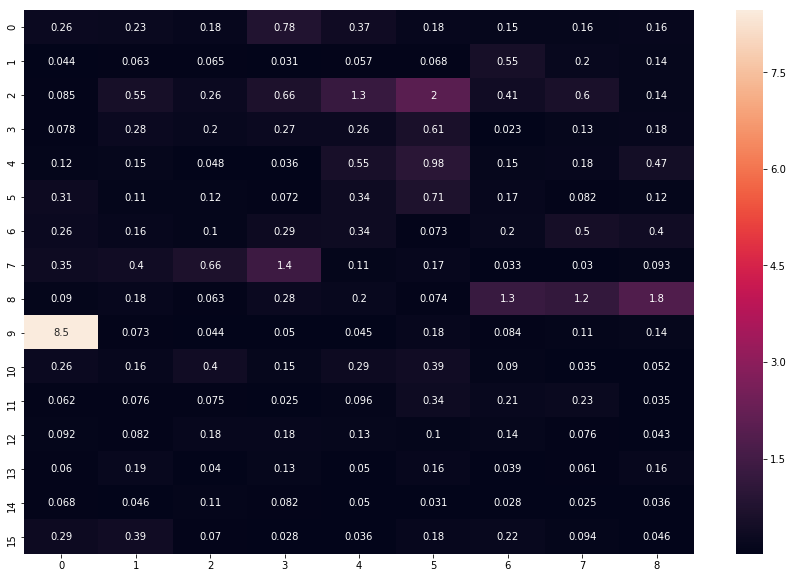

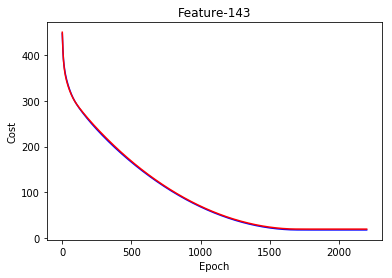

[Feature-143] R2 Score: 0.857406086723371
Cur Round ->  (10754, 142)


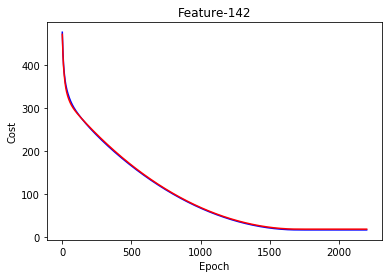

[Feature-142] R2 Score: 0.8574108343641709
Cur Round ->  (10754, 141)


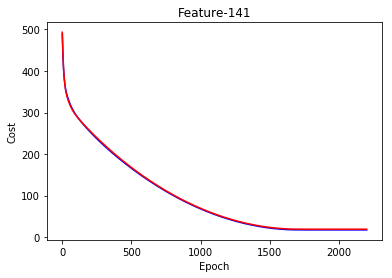

[Feature-141] R2 Score: 0.8574109718506548
Cur Round ->  (10754, 140)


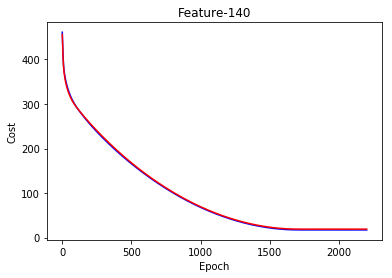

[Feature-140] R2 Score: 0.8573998929108364
Cur Round ->  (10754, 139)


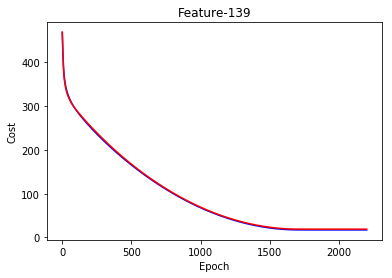

[Feature-139] R2 Score: 0.8573998870948811
Cur Round ->  (10754, 138)


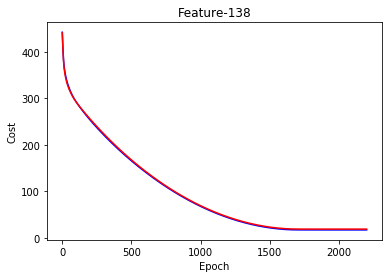

[Feature-138] R2 Score: 0.857386888471644
Cur Round ->  (10754, 137)


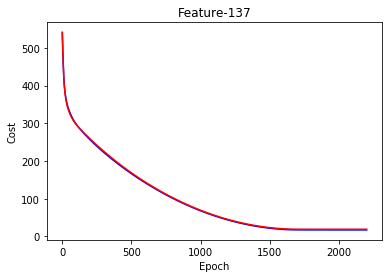

[Feature-137] R2 Score: 0.8573842495714461
Cur Round ->  (10754, 136)


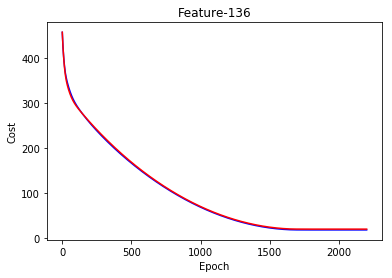

[Feature-136] R2 Score: 0.8573748072472817
Cur Round ->  (10754, 135)


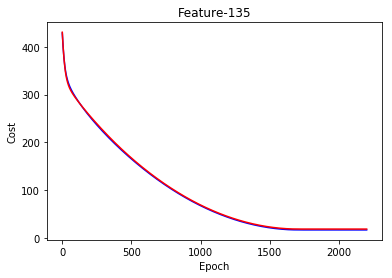

[Feature-135] R2 Score: 0.8573931636264631
Cur Round ->  (10754, 134)


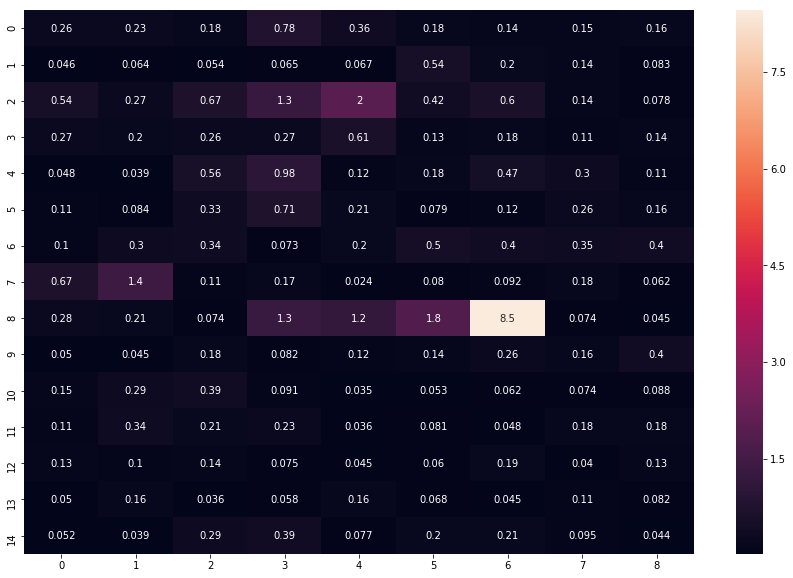

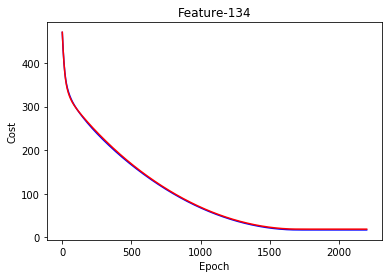

[Feature-134] R2 Score: 0.8573946415634504
Cur Round ->  (10754, 133)


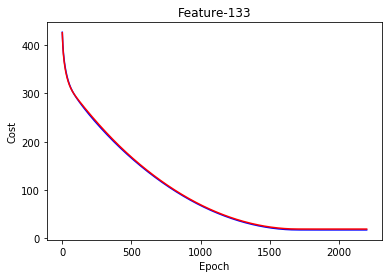

[Feature-133] R2 Score: 0.8573859019457146
Cur Round ->  (10754, 132)


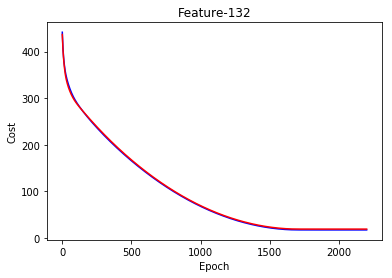

[Feature-132] R2 Score: 0.8573970621007136
Cur Round ->  (10754, 131)


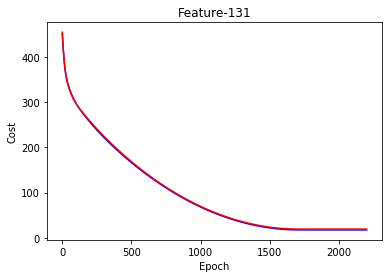

[Feature-131] R2 Score: 0.8574026004916343
Cur Round ->  (10754, 130)


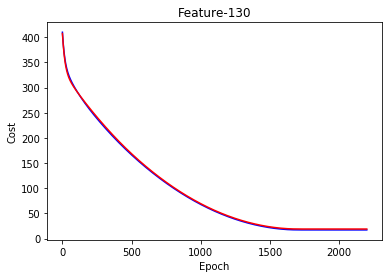

[Feature-130] R2 Score: 0.8574019699584837
Cur Round ->  (10754, 129)


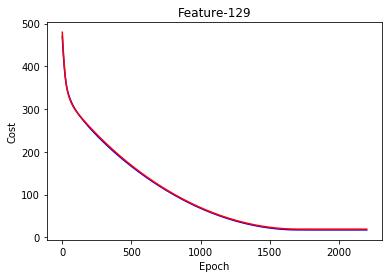

[Feature-129] R2 Score: 0.8573855051829897
Cur Round ->  (10754, 128)


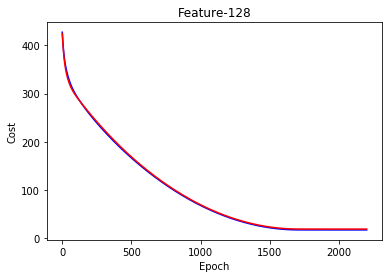

[Feature-128] R2 Score: 0.8573716217721562
Cur Round ->  (10754, 127)


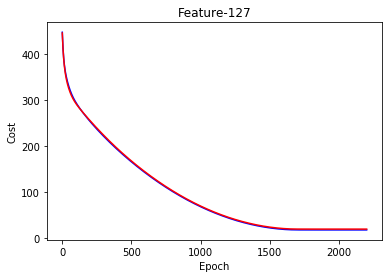

[Feature-127] R2 Score: 0.8573885678382004
Cur Round ->  (10754, 126)


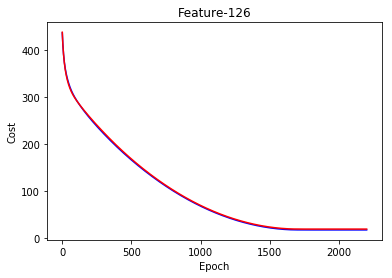

[Feature-126] R2 Score: 0.857405999625393
Cur Round ->  (10754, 125)


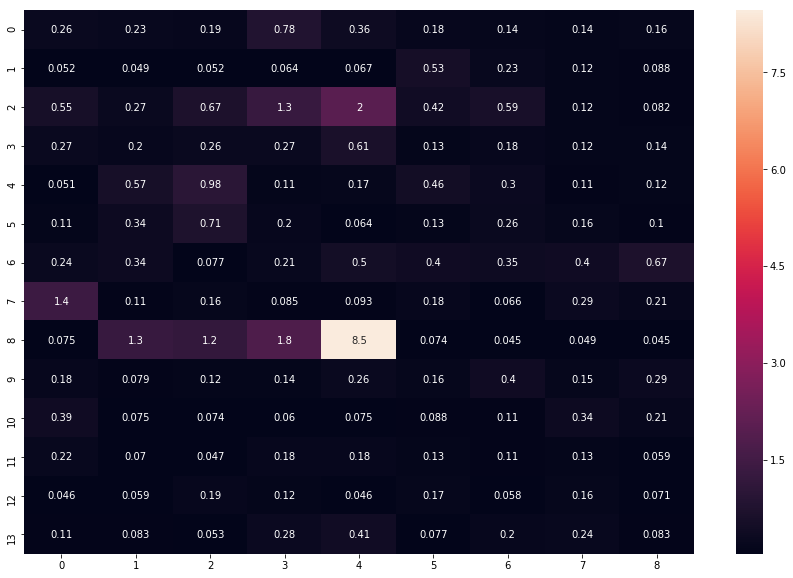

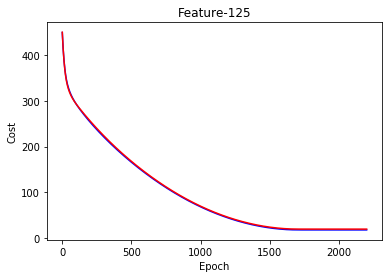

[Feature-125] R2 Score: 0.85741621542077
Cur Round ->  (10754, 124)


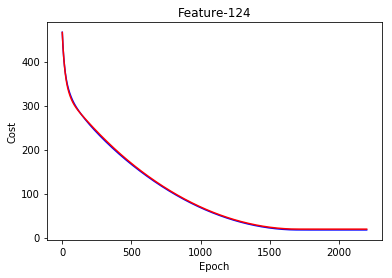

[Feature-124] R2 Score: 0.8573850652067369
Cur Round ->  (10754, 123)


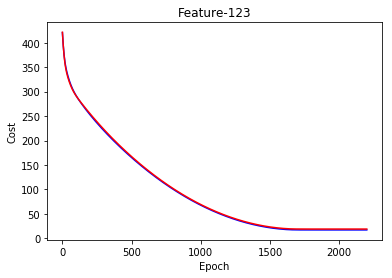

[Feature-123] R2 Score: 0.8573916200709534
Cur Round ->  (10754, 122)


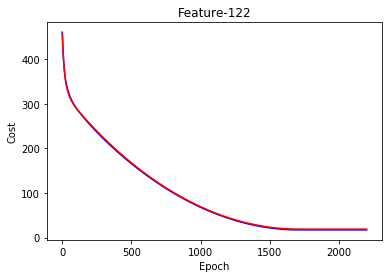

[Feature-122] R2 Score: 0.8573863880387111
Cur Round ->  (10754, 121)


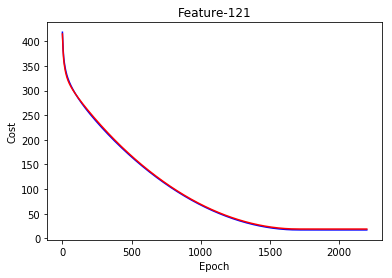

[Feature-121] R2 Score: 0.8573749153022615
Cur Round ->  (10754, 120)


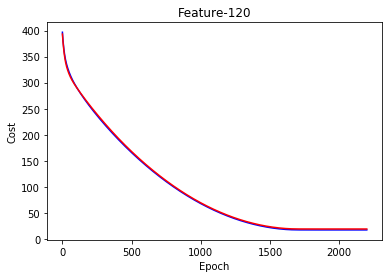

[Feature-120] R2 Score: 0.8573470703229796
Cur Round ->  (10754, 119)


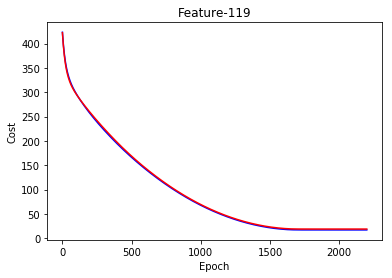

[Feature-119] R2 Score: 0.8573252431251515
Cur Round ->  (10754, 118)


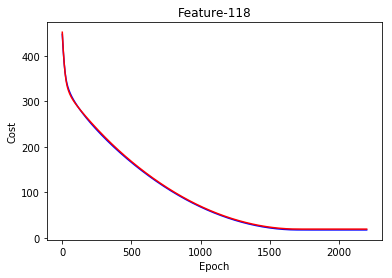

[Feature-118] R2 Score: 0.8573200032082923
Cur Round ->  (10754, 117)


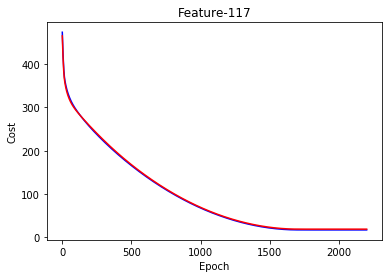

[Feature-117] R2 Score: 0.8573222206380668
Cur Round ->  (10754, 116)


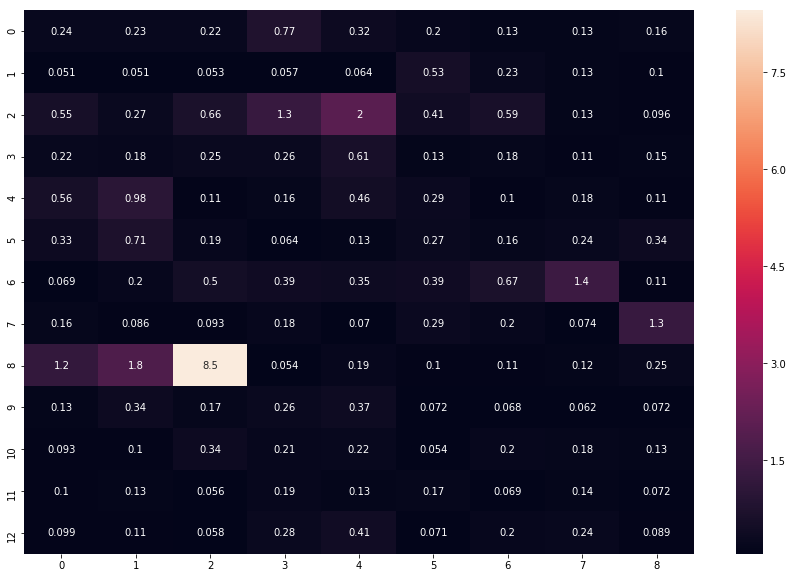

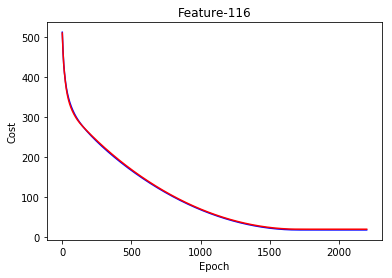

[Feature-116] R2 Score: 0.8573558176456022
Cur Round ->  (10754, 115)


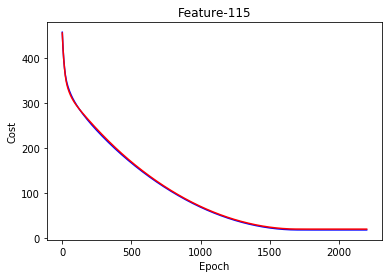

[Feature-115] R2 Score: 0.8573386118381116
Cur Round ->  (10754, 114)


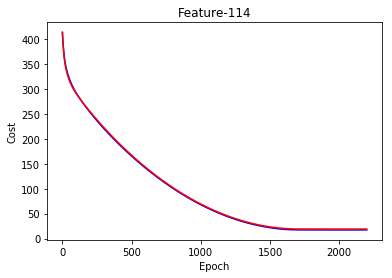

[Feature-114] R2 Score: 0.8573436282201283
Cur Round ->  (10754, 113)


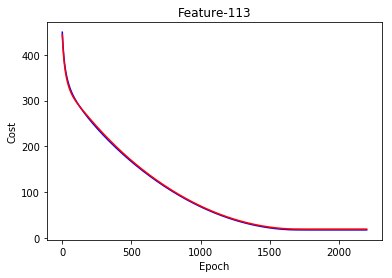

[Feature-113] R2 Score: 0.8573406567613848
Cur Round ->  (10754, 112)


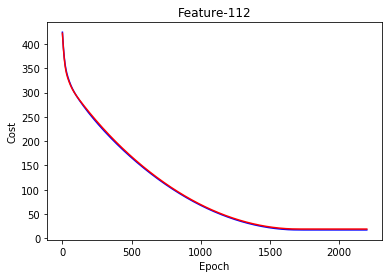

[Feature-112] R2 Score: 0.85731683841428
Cur Round ->  (10754, 111)


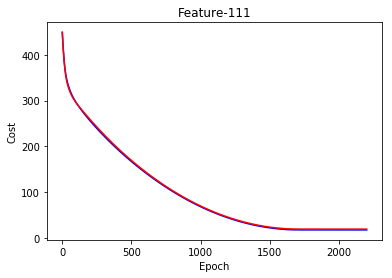

[Feature-111] R2 Score: 0.8572883919255947
Cur Round ->  (10754, 110)


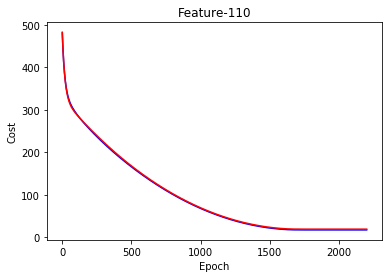

[Feature-110] R2 Score: 0.8572577168744054
Cur Round ->  (10754, 109)


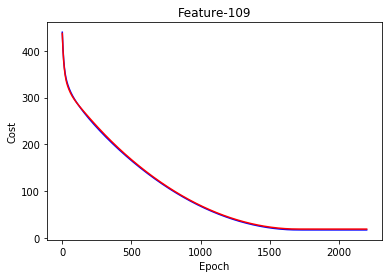

[Feature-109] R2 Score: 0.8573044406797996
Cur Round ->  (10754, 108)


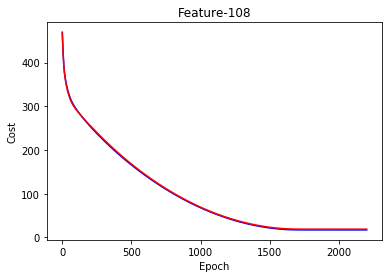

[Feature-108] R2 Score: 0.857350124467822
Cur Round ->  (10754, 107)


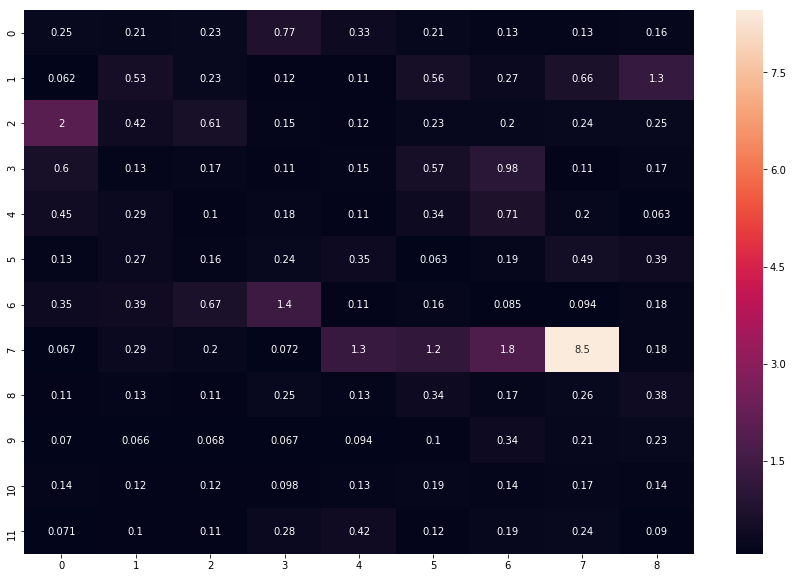

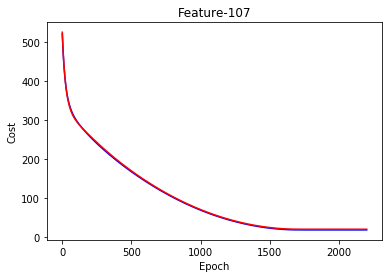

[Feature-107] R2 Score: 0.8573631489898892
Cur Round ->  (10754, 106)


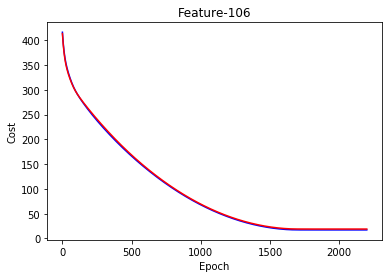

[Feature-106] R2 Score: 0.857363073744773
Cur Round ->  (10754, 105)


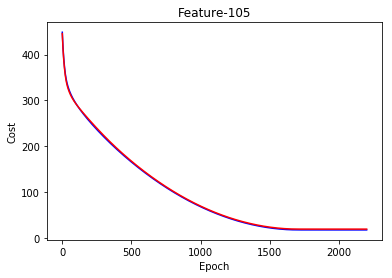

[Feature-105] R2 Score: 0.8573710991693677
Cur Round ->  (10754, 104)


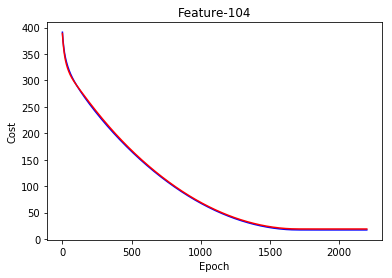

[Feature-104] R2 Score: 0.8573876739203947
Cur Round ->  (10754, 103)


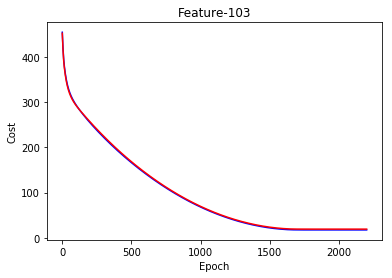

[Feature-103] R2 Score: 0.8573607833960377
Cur Round ->  (10754, 102)


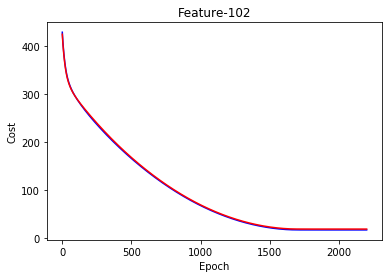

[Feature-102] R2 Score: 0.8573999447476933
Cur Round ->  (10754, 101)


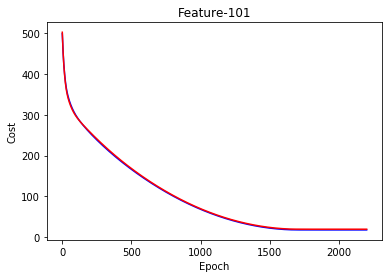

[Feature-101] R2 Score: 0.8574148893770324
Cur Round ->  (10754, 100)


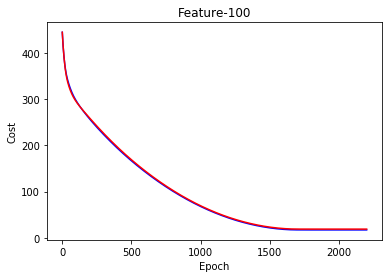

[Feature-100] R2 Score: 0.8574433261968053
Cur Round ->  (10754, 99)


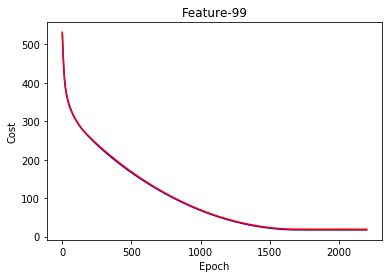

[Feature-99] R2 Score: 0.8574583211067843
Cur Round ->  (10754, 98)


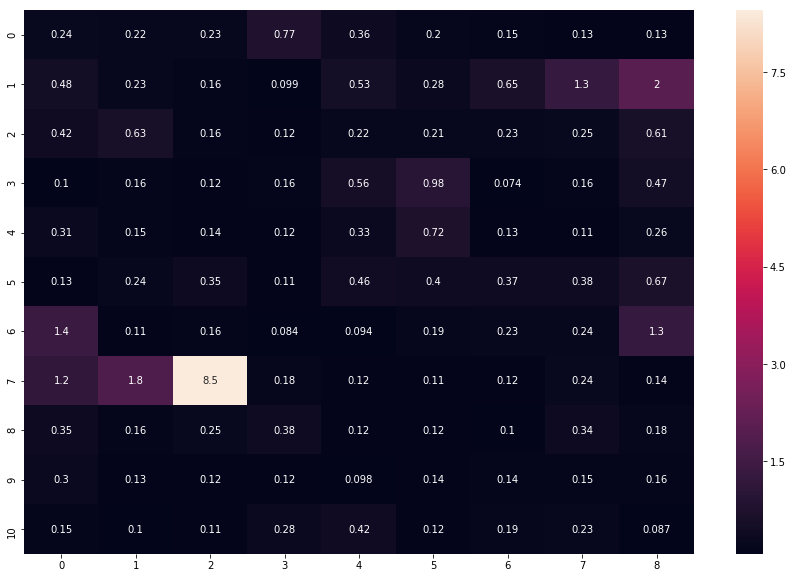

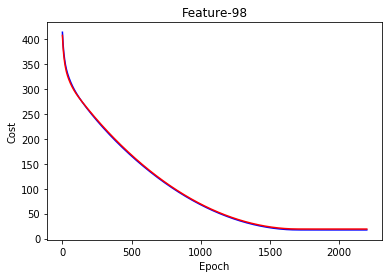

[Feature-98] R2 Score: 0.8574421783642627
Cur Round ->  (10754, 97)


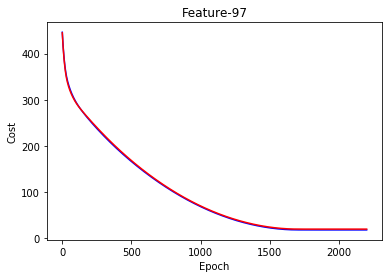

[Feature-97] R2 Score: 0.8574401776097007
Cur Round ->  (10754, 96)


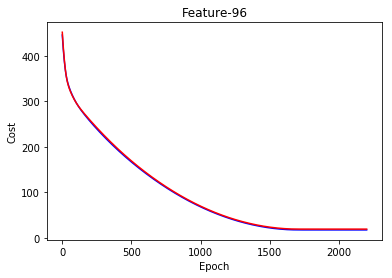

[Feature-96] R2 Score: 0.857318972920791
Cur Round ->  (10754, 95)


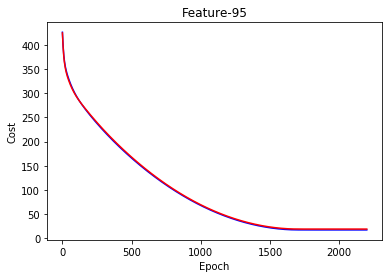

[Feature-95] R2 Score: 0.857314373079332
Cur Round ->  (10754, 94)


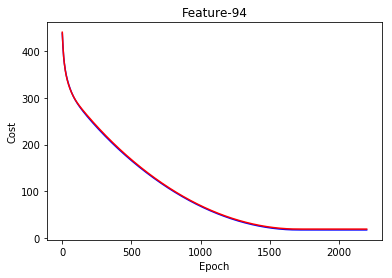

[Feature-94] R2 Score: 0.8572843049776784
Cur Round ->  (10754, 93)


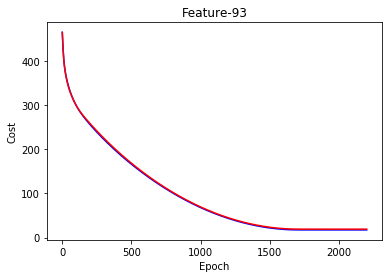

[Feature-93] R2 Score: 0.8572794332263394
Cur Round ->  (10754, 92)


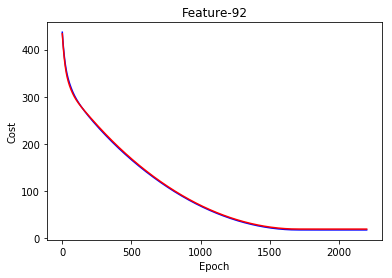

[Feature-92] R2 Score: 0.8572765622500065
Cur Round ->  (10754, 91)


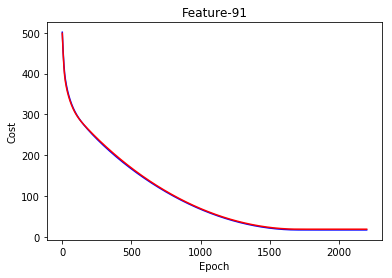

[Feature-91] R2 Score: 0.8572852262517672
Cur Round ->  (10754, 90)


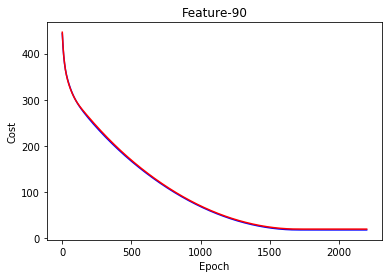

[Feature-90] R2 Score: 0.8572836250223385
Cur Round ->  (10754, 89)


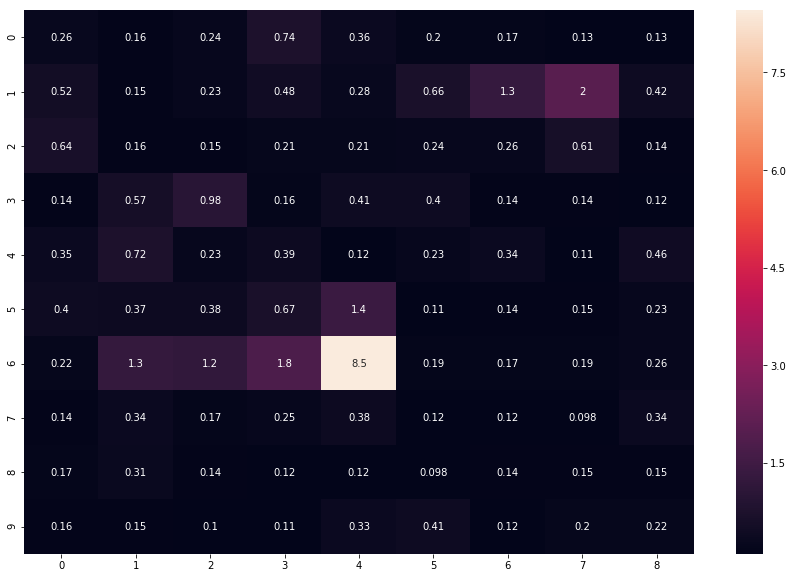

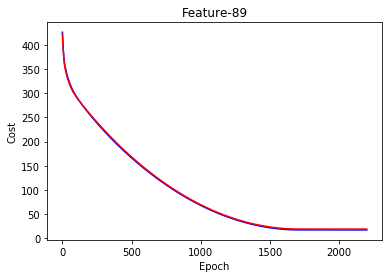

[Feature-89] R2 Score: 0.857267838970918
Cur Round ->  (10754, 88)


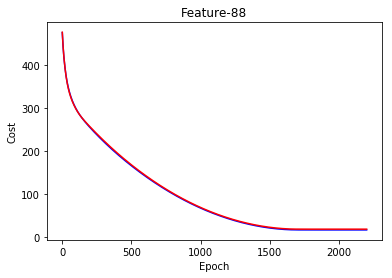

[Feature-88] R2 Score: 0.857354166947713
Cur Round ->  (10754, 87)


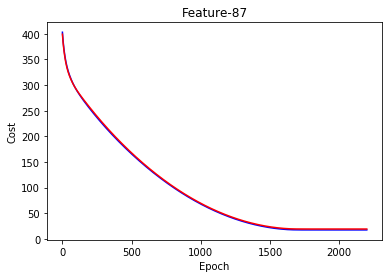

[Feature-87] R2 Score: 0.8572810888831579
Cur Round ->  (10754, 86)


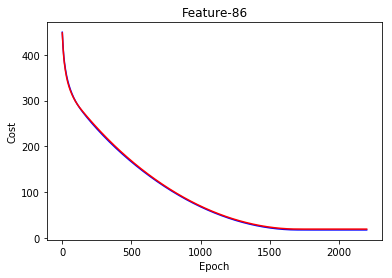

[Feature-86] R2 Score: 0.8570651939214988
Cur Round ->  (10754, 85)


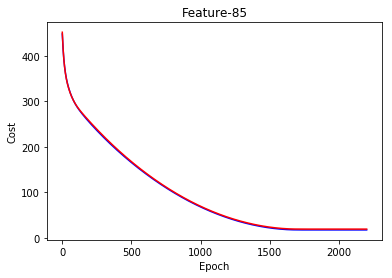

[Feature-85] R2 Score: 0.8570504526151119
Cur Round ->  (10754, 84)


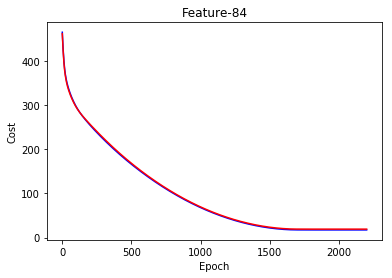

[Feature-84] R2 Score: 0.8570489231805767
Cur Round ->  (10754, 83)


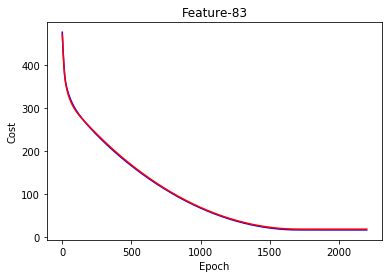

[Feature-83] R2 Score: 0.857191465975797
Cur Round ->  (10754, 82)


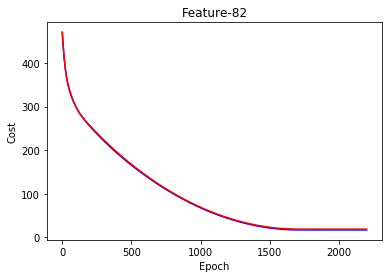

[Feature-82] R2 Score: 0.8572337787203335
Cur Round ->  (10754, 81)


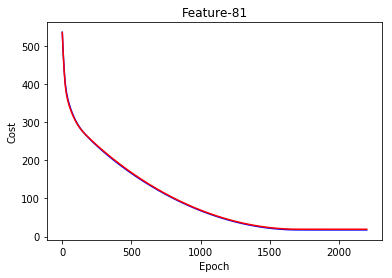

[Feature-81] R2 Score: 0.857262255500133
Cur Round ->  (10754, 80)


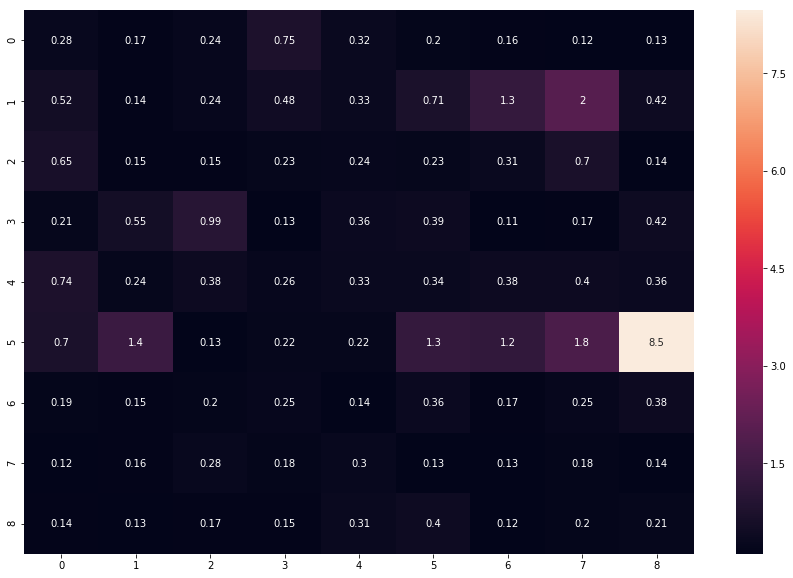

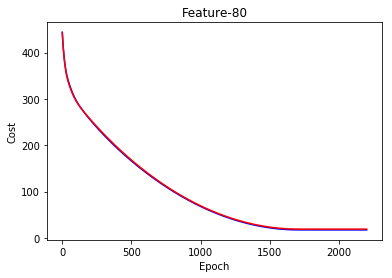

[Feature-80] R2 Score: 0.8572716518636744
Cur Round ->  (10754, 79)


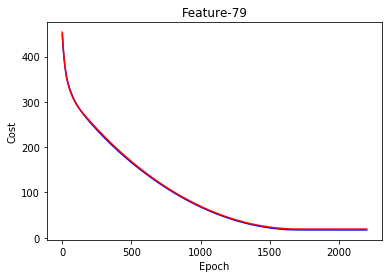

[Feature-79] R2 Score: 0.8572674803444496
Cur Round ->  (10754, 78)


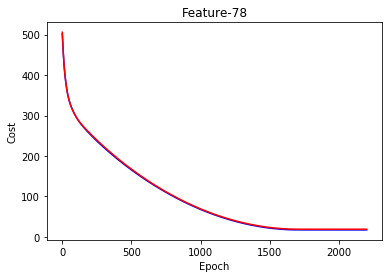

[Feature-78] R2 Score: 0.8572614848029214
Cur Round ->  (10754, 77)


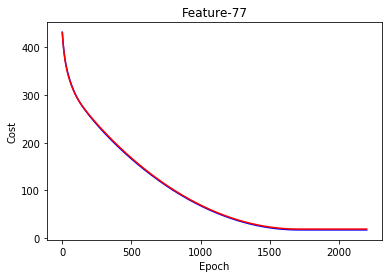

[Feature-77] R2 Score: 0.8572871526581403
Cur Round ->  (10754, 76)


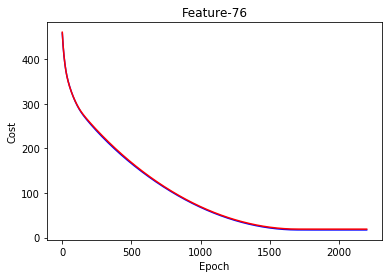

[Feature-76] R2 Score: 0.8572559874117974
Cur Round ->  (10754, 75)


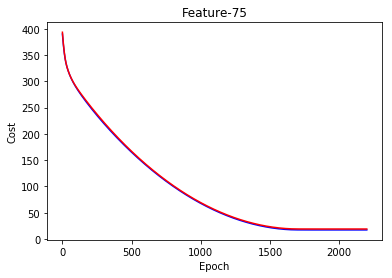

[Feature-75] R2 Score: 0.8572833695137227
Cur Round ->  (10754, 74)


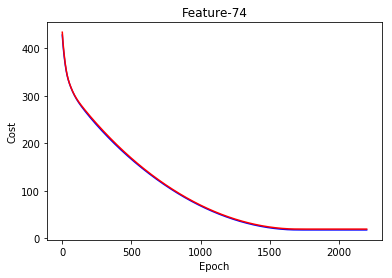

[Feature-74] R2 Score: 0.8572987069527458
Cur Round ->  (10754, 73)


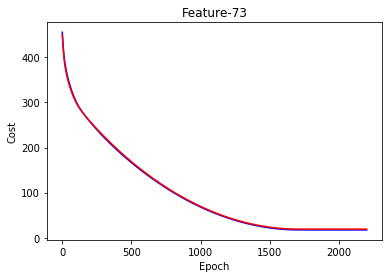

[Feature-73] R2 Score: 0.8572877880707893
Cur Round ->  (10754, 72)


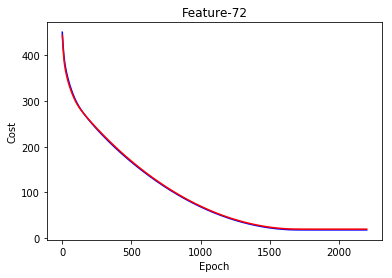

[Feature-72] R2 Score: 0.8573524719741217
Cur Round ->  (10754, 71)


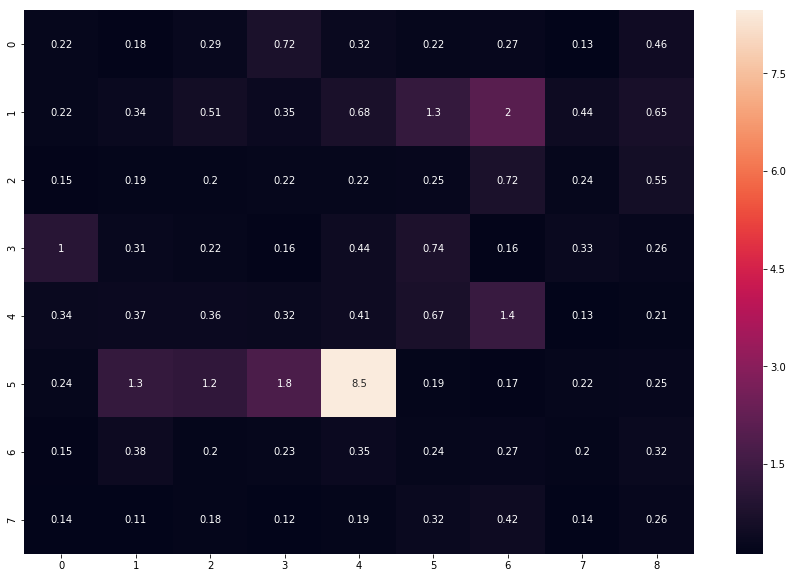

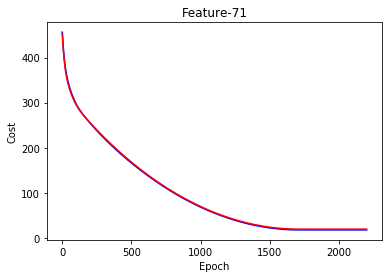

[Feature-71] R2 Score: 0.8573862815719691
Cur Round ->  (10754, 70)


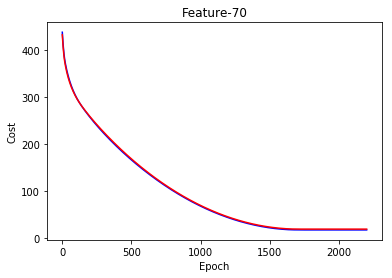

[Feature-70] R2 Score: 0.8573822620579801
Cur Round ->  (10754, 69)


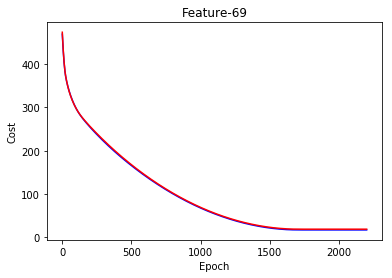

[Feature-69] R2 Score: 0.8575122501849379
Cur Round ->  (10754, 68)


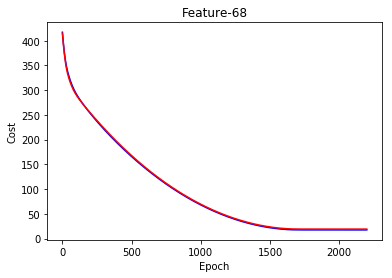

[Feature-68] R2 Score: 0.857528929702952
Cur Round ->  (10754, 67)


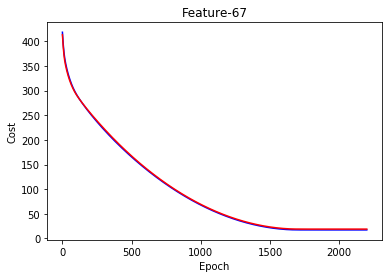

[Feature-67] R2 Score: 0.8576115930831177
Cur Round ->  (10754, 66)


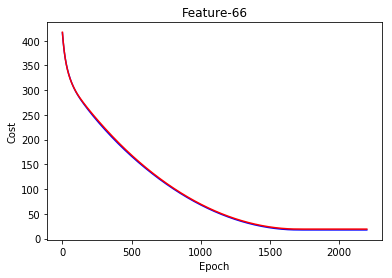

[Feature-66] R2 Score: 0.8576774328465393
Cur Round ->  (10754, 65)


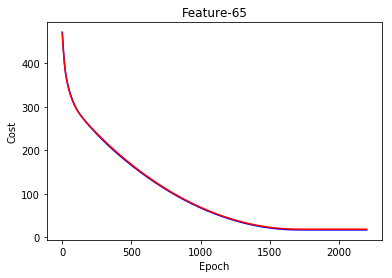

[Feature-65] R2 Score: 0.8576672441437544
Cur Round ->  (10754, 64)


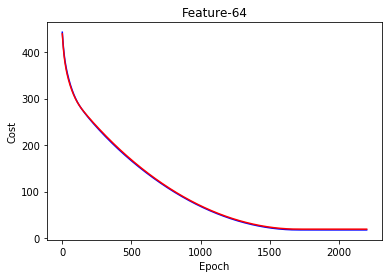

[Feature-64] R2 Score: 0.8577431072851547
Cur Round ->  (10754, 63)


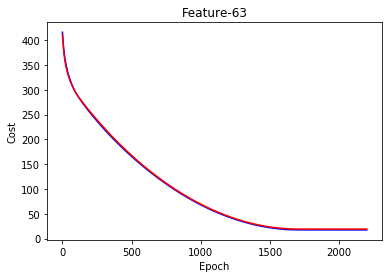

[Feature-63] R2 Score: 0.8573729324055528
Cur Round ->  (10754, 62)


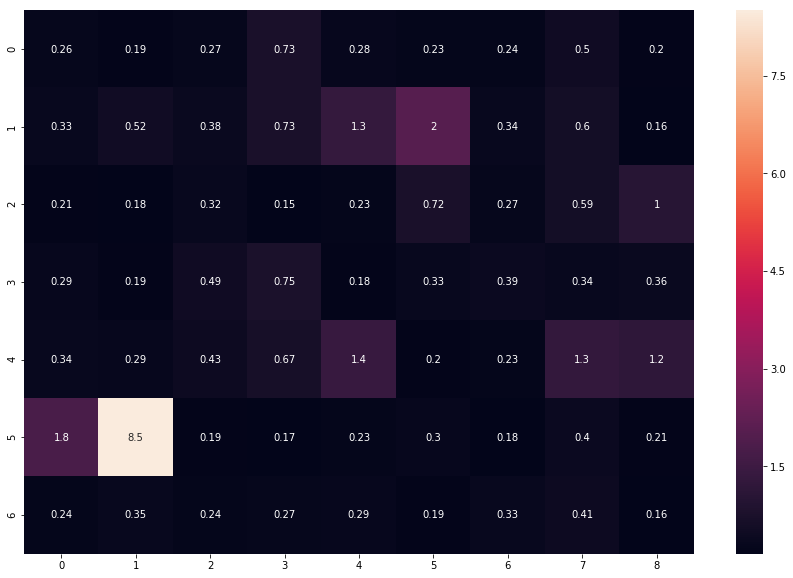

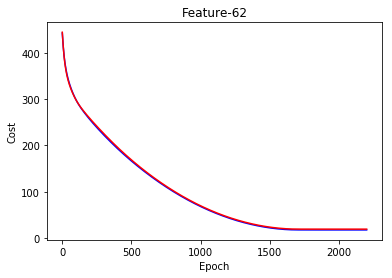

[Feature-62] R2 Score: 0.8573277125843299
Cur Round ->  (10754, 61)


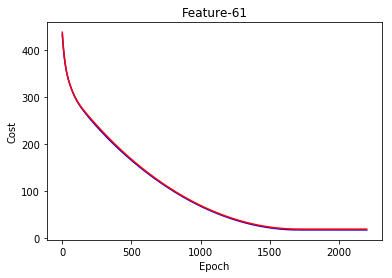

[Feature-61] R2 Score: 0.8573167858126632
Cur Round ->  (10754, 60)


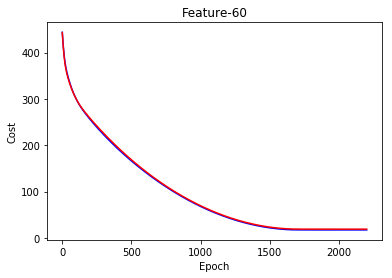

[Feature-60] R2 Score: 0.8573092009538841
Cur Round ->  (10754, 59)


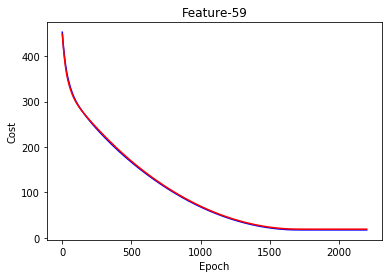

[Feature-59] R2 Score: 0.8571893905137268
Cur Round ->  (10754, 58)


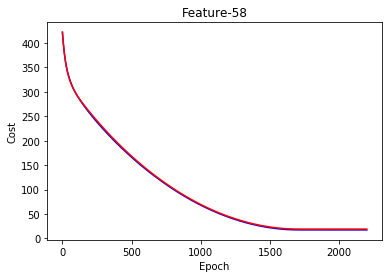

[Feature-58] R2 Score: 0.8571889030274296
Cur Round ->  (10754, 57)


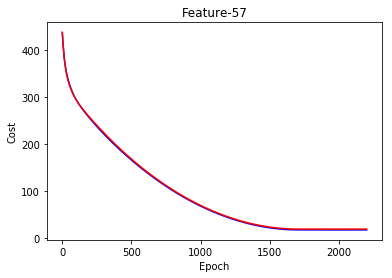

[Feature-57] R2 Score: 0.8571533298587415
Cur Round ->  (10754, 56)


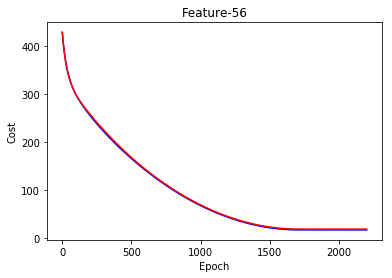

[Feature-56] R2 Score: 0.8571744418937562
Cur Round ->  (10754, 55)


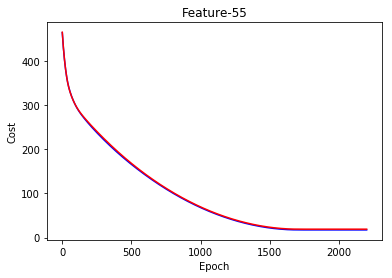

[Feature-55] R2 Score: 0.8570141397575001
Cur Round ->  (10754, 54)


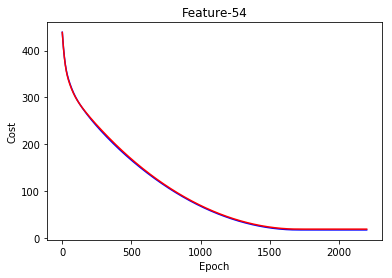

[Feature-54] R2 Score: 0.8570174766775759
Cur Round ->  (10754, 53)


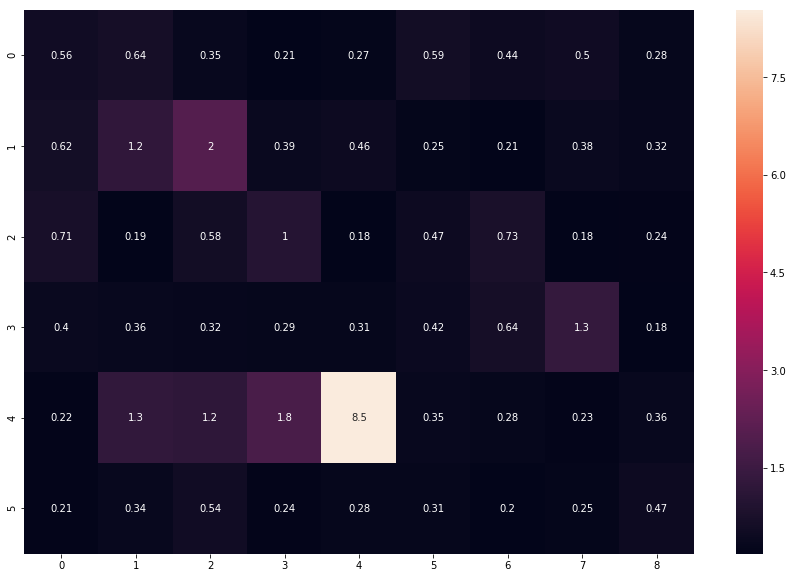

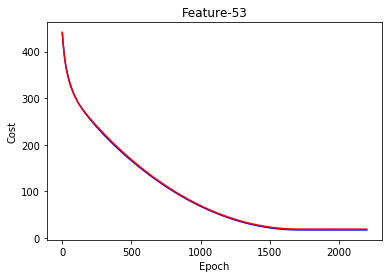

[Feature-53] R2 Score: 0.8571435891453046
Cur Round ->  (10754, 52)


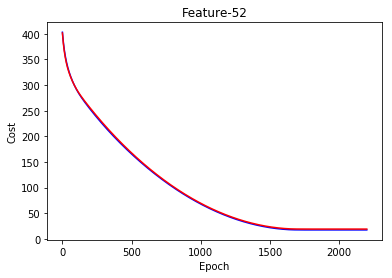

[Feature-52] R2 Score: 0.857126537427295
Cur Round ->  (10754, 51)


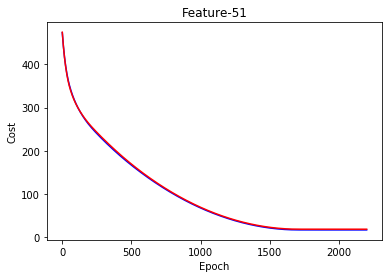

[Feature-51] R2 Score: 0.85718027787355
Cur Round ->  (10754, 50)


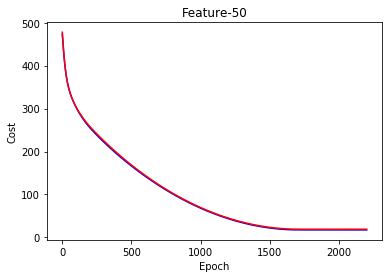

[Feature-50] R2 Score: 0.8571729246111403
Cur Round ->  (10754, 49)


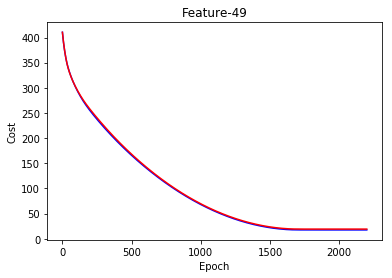

[Feature-49] R2 Score: 0.8571760191536756
Cur Round ->  (10754, 48)


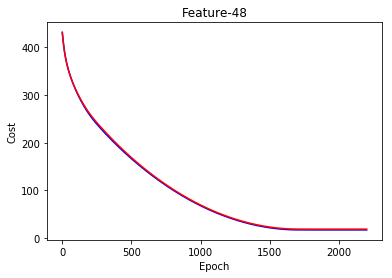

[Feature-48] R2 Score: 0.8571785259220326
Cur Round ->  (10754, 47)


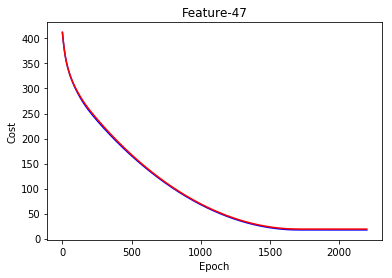

[Feature-47] R2 Score: 0.8570378954739245
Cur Round ->  (10754, 46)


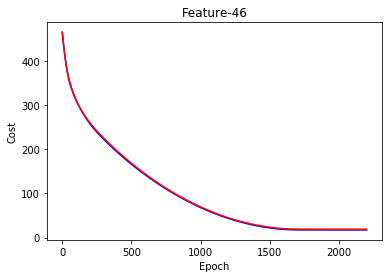

[Feature-46] R2 Score: 0.8569896982070337
Cur Round ->  (10754, 45)


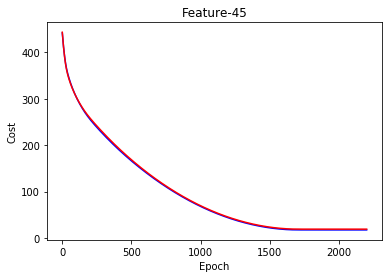

[Feature-45] R2 Score: 0.8570233909011977
Cur Round ->  (10754, 44)


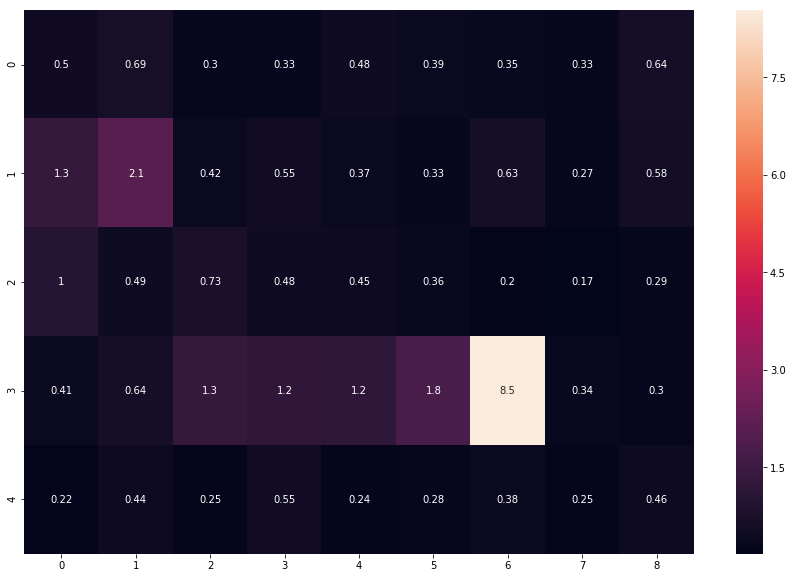

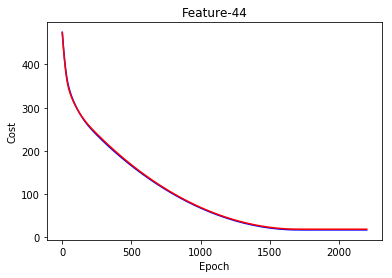

[Feature-44] R2 Score: 0.8570568319179772
Cur Round ->  (10754, 43)


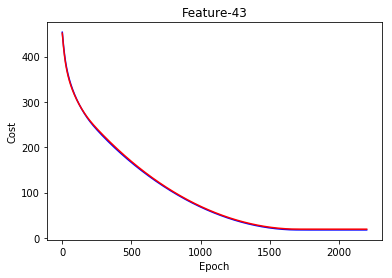

[Feature-43] R2 Score: 0.8570408957075069
Cur Round ->  (10754, 42)


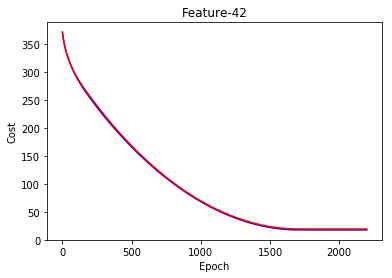

[Feature-42] R2 Score: 0.857052534079486
Cur Round ->  (10754, 41)


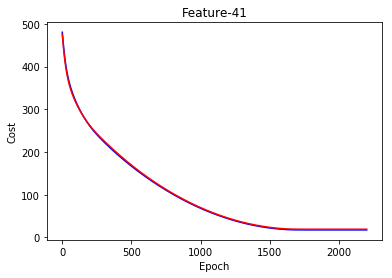

[Feature-41] R2 Score: 0.8570502151708619
Cur Round ->  (10754, 40)


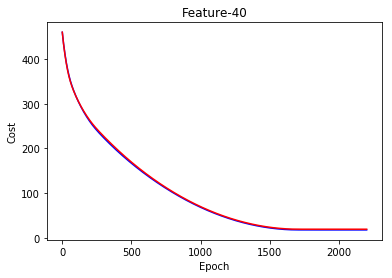

[Feature-40] R2 Score: 0.857214919523076
Cur Round ->  (10754, 39)


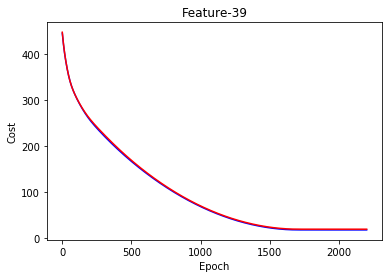

[Feature-39] R2 Score: 0.8572327637866566
Cur Round ->  (10754, 38)


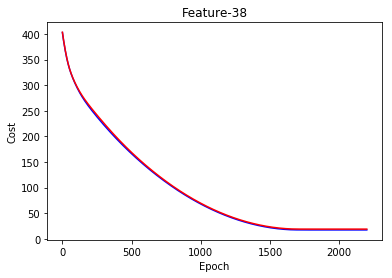

[Feature-38] R2 Score: 0.857195436751512
Cur Round ->  (10754, 37)


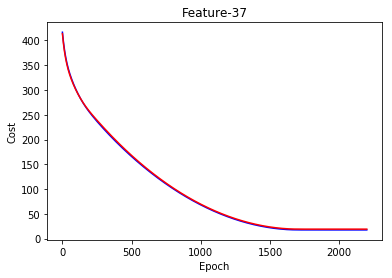

[Feature-37] R2 Score: 0.8571892883088145
Cur Round ->  (10754, 36)


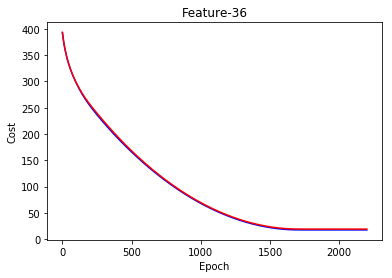

[Feature-36] R2 Score: 0.8571661776996302
Cur Round ->  (10754, 35)


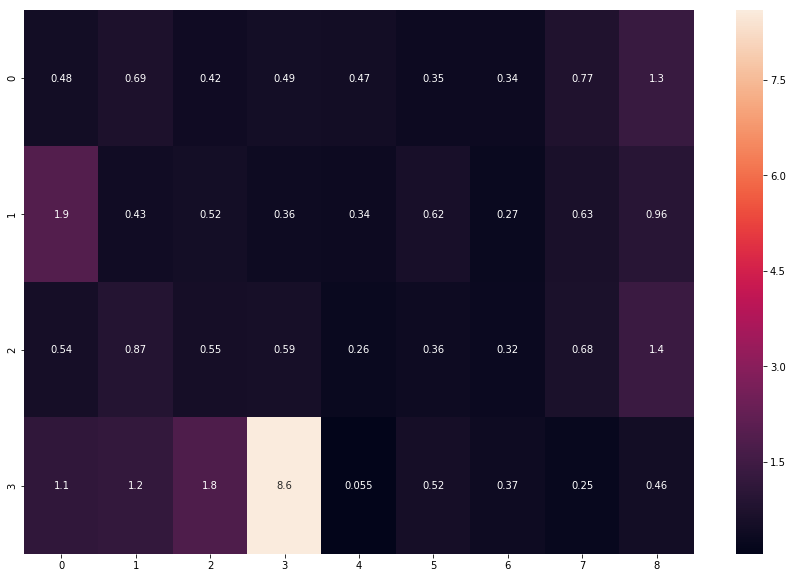

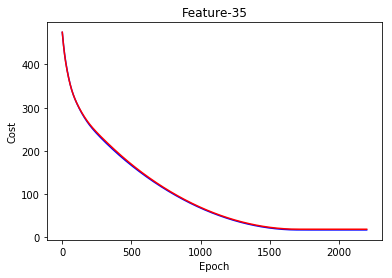

[Feature-35] R2 Score: 0.8571684718510092
Cur Round ->  (10754, 34)


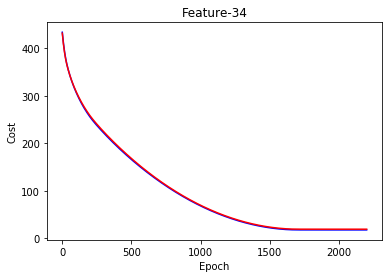

[Feature-34] R2 Score: 0.8573657371203687
Cur Round ->  (10754, 33)


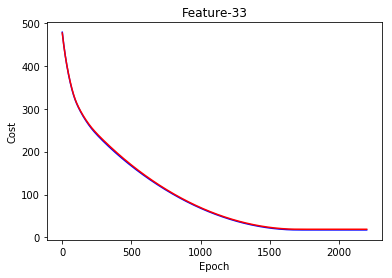

[Feature-33] R2 Score: 0.8573725407373022
Cur Round ->  (10754, 32)


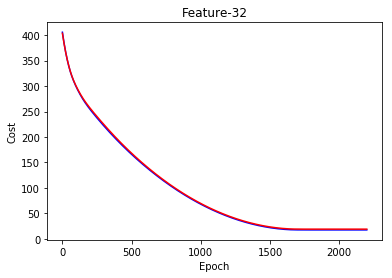

[Feature-32] R2 Score: 0.8573133172968361
Cur Round ->  (10754, 31)


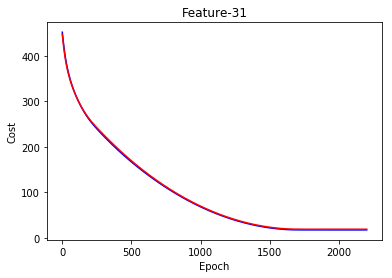

[Feature-31] R2 Score: 0.8573123216425149
Cur Round ->  (10754, 30)


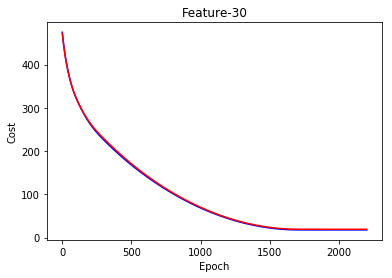

[Feature-30] R2 Score: 0.8569190298480985
Cur Round ->  (10754, 29)


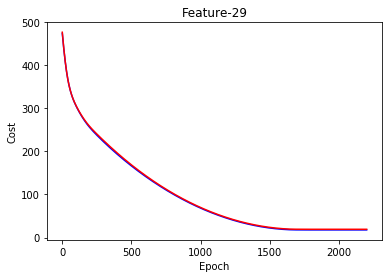

[Feature-29] R2 Score: 0.8571534919462209
Cur Round ->  (10754, 28)


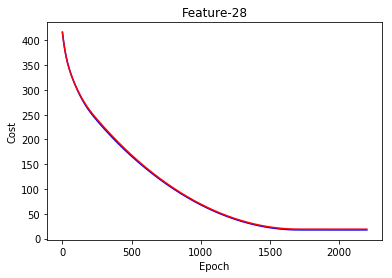

[Feature-28] R2 Score: 0.8571250820294853
Cur Round ->  (10754, 27)


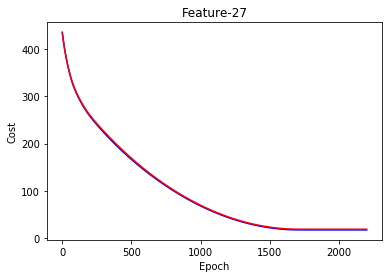

[Feature-27] R2 Score: 0.8572096469739057
Cur Round ->  (10754, 26)


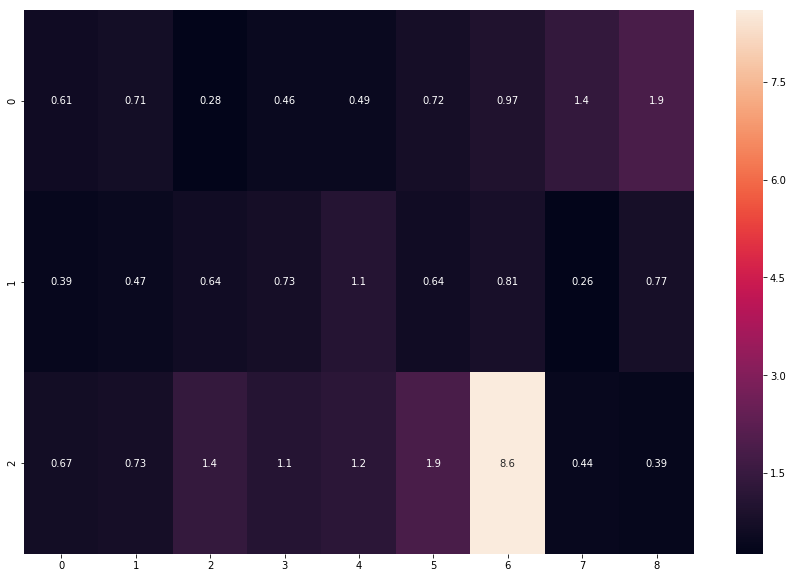

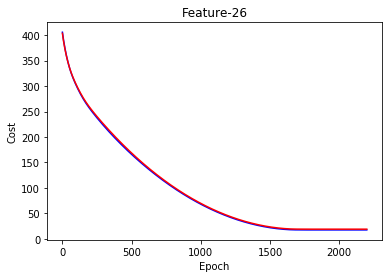

[Feature-26] R2 Score: 0.8570172396254492
Cur Round ->  (10754, 25)


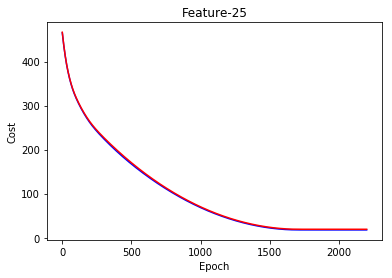

[Feature-25] R2 Score: 0.8569684833327915
Cur Round ->  (10754, 24)


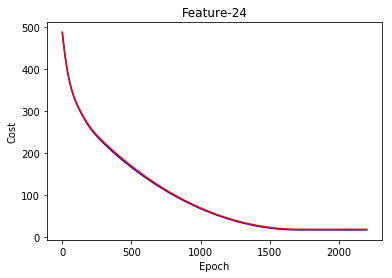

[Feature-24] R2 Score: 0.8572284934811168
Cur Round ->  (10754, 23)


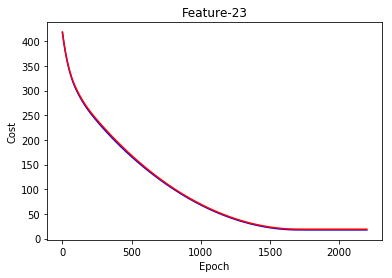

[Feature-23] R2 Score: 0.8572072524548625
Cur Round ->  (10754, 22)


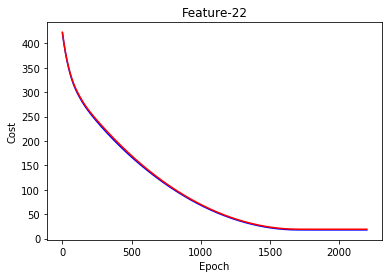

[Feature-22] R2 Score: 0.8572147494728594
Cur Round ->  (10754, 21)


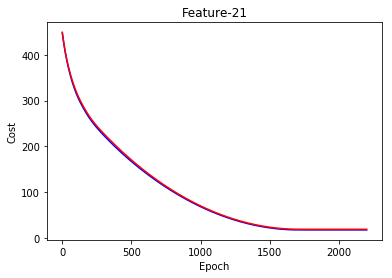

[Feature-21] R2 Score: 0.8567629190603299
Cur Round ->  (10754, 20)


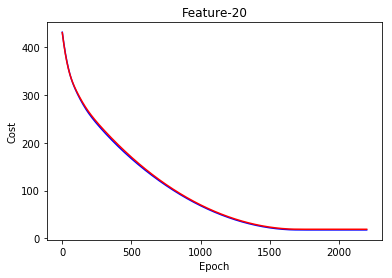

[Feature-20] R2 Score: 0.8566280726373832
Cur Round ->  (10754, 19)


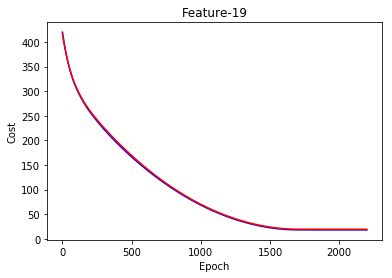

[Feature-19] R2 Score: 0.8563962772351488
Cur Round ->  (10754, 18)


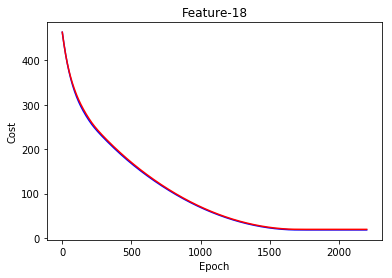

[Feature-18] R2 Score: 0.8568659834775364
Cur Round ->  (10754, 17)


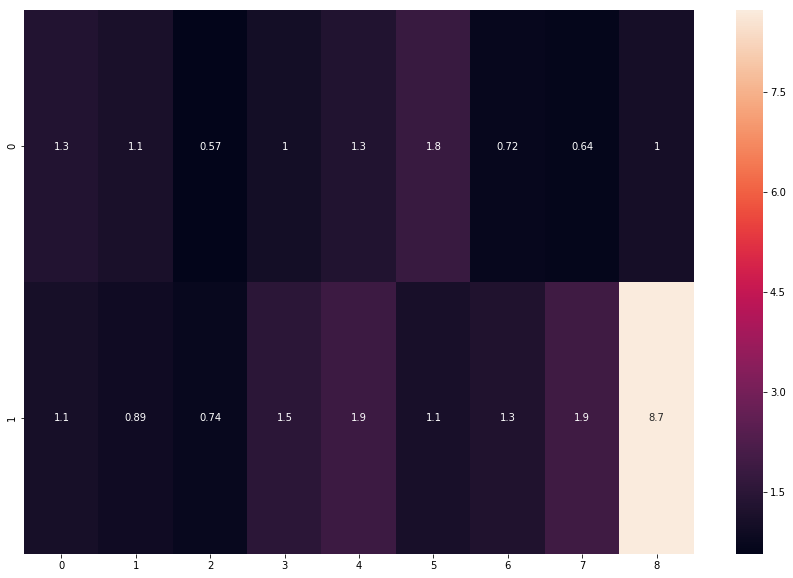

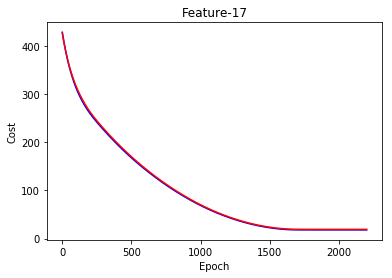

[Feature-17] R2 Score: 0.856889748040406
Cur Round ->  (10754, 16)


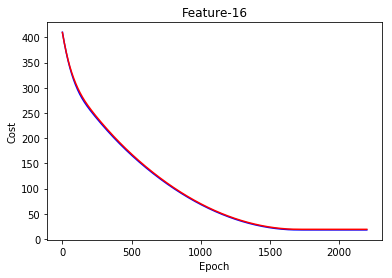

[Feature-16] R2 Score: 0.8568120660226743
Cur Round ->  (10754, 15)


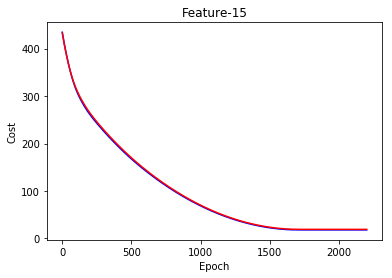

[Feature-15] R2 Score: 0.8564309762050653
Cur Round ->  (10754, 14)


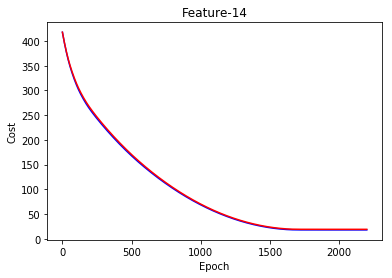

[Feature-14] R2 Score: 0.856042209630115
Cur Round ->  (10754, 13)


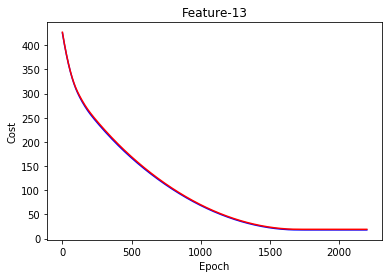

[Feature-13] R2 Score: 0.8558956947098743
Cur Round ->  (10754, 12)


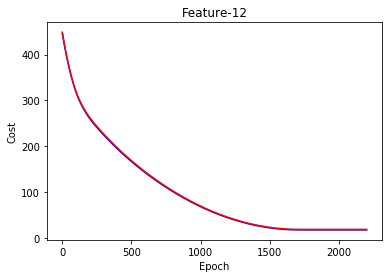

[Feature-12] R2 Score: 0.8562688441268582


In [9]:
"""
    TF Parameters - Select Feature 12
"""

isDone = False 
histroys_drop = []
while isDone != True:
    print ("Cur Round -> ", X_train_std.shape)
    # Initialize 
    lr = 1e-3
    epochs = 22000
    batch_size = 11326
    input_size = X_train_std.shape[1]
    regr_rate_l1 = tf.constant(5e-2)
    regr_rate_l2 = tf.constant(6e-3)
    x = tf.placeholder(shape=(None, input_size), dtype=tf.float32)
    y = tf.placeholder(shape=(None, 1), dtype=tf.float32)
    w = tf.Variable(tf.truncated_normal([input_size, 1], mean=0.0, stddev=0.5), dtype=tf.float32, name="weights")
    b = tf.Variable(np.zeros(shape=(1,)), dtype=tf.float32, name="bias")
    y_pred = tf.add(tf.matmul(x, w), b)
#     loss = tf.losses.absolute_difference(y, y_pred) + regr_rate_l2 * tf.nn.l2_loss(w) #+ regr_rate_l1 * tf.reduce_sum(tf.abs(w))
    loss = tf.losses.mean_squared_error(y, y_pred) + regr_rate_l2 * tf.nn.l2_loss(w) #+ regr_rate_l1 * tf.reduce_sum(tf.abs(w))
    opt = tf.train.AdamOptimizer(learning_rate=lr)
    gvs = opt.compute_gradients(loss)
    capped_gvs = [(tf.clip_by_value(grad, -1.5, 3.0), var) if grad != None else (grad, var) for grad, var in gvs]
    opt = opt.apply_gradients(capped_gvs)
    # Training 
    init = tf.global_variables_initializer()
    histroys_train_loss = []
    histroys_test_loss = []
    with tf.Session() as sess:
        sess.run(init)
        mse_train_min = 999999999.99
        mse_test_min = 999999999.99
        for epoch in range(epochs):
            mse_train = 0
            xs = X_train_std.reshape(-1, input_size).astype(float)
            ys = y_train_std.reshape(-1, 1).astype(float)
            _, loss_val, loss_temp = sess.run([opt, loss, y_pred], feed_dict={x:xs, y:ys})
            mse_train = loss_temp
            if epoch % 10 == 0:
                w_out, b_out = sess.run([w, b])
                y_prediction = np.dot(X_val_std, w_out) + b_out
                mse_train = mean_squared_error(loss_temp, ys)
                mse_test = mean_squared_error(y_prediction, y_val)
                histroys_train_loss.append(mse_train)
                histroys_test_loss.append(mse_test)
#                 print("[{}] train-loss: {}, test-loss: {}".format(epoch, mse_train, mse_test))
                if mse_train_min >= mse_train:
                    mse_train_min = mse_train
                if mse_test_min >= mse_test:
                    mse_test_min = mse_test
                val = mse_test - mse_test_min
                if val > 0.5 and epoch > 10000:
                    print ('[{}] Early Stop !'.format(epoch))
                    break 
        w_out, b_out = sess.run([w, b])
    # Draw Cost
    ticks = [el for el in range(1, int(epochs/10)+1)]
    plt.subplots()
    plt.plot(histroys_train_loss, label='train_loss',color = 'b')
    plt.plot(histroys_test_loss, label='test_loss',color = 'r')
    plt.ylabel('Cost')
    plt.xlabel('Epoch')
    titleName = 'Feature-' + str(input_size)
    plt.title(titleName)
    pltName = './temp/Loss-' + titleName + '.png'
    plt.savefig(pltName)
    plt.show()
    # R2 Score 
    y_pred = np.dot(X_val_std, w_out) + b_out
    mse = mean_squared_error(y_val, y_pred)
    print ("[Feature-{}] R2 Score: {}".format(input_size, r2_score(y_val, y_pred)))
    # Feature selections 
    w_abs = np.absolute(w_out)
    Plot_weight(w_abs)
    w_min_index = np.argmin(w_abs)
    # Terminate 
    if input_size <= 12:
        isDone = True 
        break
    ## Drop Features 
    histroys_drop.append(w_min_index)
    X_all_std = np.delete(X_all_std, w_min_index, axis=1)
    X_train_std = np.delete(X_train_std, w_min_index, axis=1)
    X_val_std = np.delete(X_val_std, w_min_index, axis=1)
    X_test_std = np.delete(X_test_std, w_min_index, axis=1)

In [ ]:
poly = PolynomialFeatures(degree=2)
poly.fit(X_train_std)
X_all_poly = poly.transform(X_all_std)
X_train_poly = poly.transform(X_train_std)
X_val_poly = poly.transform(X_val_std)
X_test_poly = poly.transform(X_test_std)

In [10]:
"""
    Train whole datas
"""

epochs = 12000
batch_size = 16052
input_size = X_all_poly.shape[1]
histroys_train_loss = []
histroys_test_loss = []
regr_rate_l1 = tf.constant(5e-2)
regr_rate_l2 = tf.constant(6e-3)
x = tf.placeholder(shape=(None, input_size), dtype=tf.float32)
y = tf.placeholder(shape=(None, 1), dtype=tf.float32)
w = tf.Variable(tf.truncated_normal([input_size, 1], mean=0.0, stddev=0.5), dtype=tf.float32, name="weights")
b = tf.Variable(np.zeros(shape=(1,)), dtype=tf.float32, name="bias")
y_pred = tf.add(tf.matmul(x, w), b)
loss = tf.losses.mean_squared_error(y, y_pred) + regr_rate_l2 * tf.nn.l2_loss(w) #+ regr_rate_l1 * tf.reduce_sum(tf.abs(w))
opt = tf.train.AdamOptimizer(learning_rate=lr)
gvs = opt.compute_gradients(loss)
capped_gvs = [(tf.clip_by_value(grad, -1.5, 3.0), var) if grad != None else (grad, var) for grad, var in gvs]
opt = opt.apply_gradients(capped_gvs)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        mse_train = 0
        xs = X_all_poly.reshape(-1, input_size).astype(float)
        ys = y_all_std.reshape(-1, 1).astype(float)
        _, loss_val, loss_temp = sess.run([opt, loss, y_pred], feed_dict={x:xs, y:ys})
        if epoch % 10 == 0:
            w_out, b_out = sess.run([w, b])
            y_prediction = np.dot(X_val_poly, w_out) + b_out
            mse_train = mean_squared_error(loss_temp, ys)
            mse_test = mean_squared_error(y_prediction, y_val)
            histroys_train_loss.append(mse_train)
            histroys_test_loss.append(mse_test)
            print("[{}] train-loss: {}, test-loss: {}".format(epoch, mse_train, mse_test))
    
    w_out, b_out = sess.run([w, b])


NameError: name 'X_all_poly' is not defined

In [ ]:
# Draw Cost
ticks = [el for el in range(1, int(epochs/10)+1)]
plt.subplots()
plt.plot(histroys_train_loss, label='train_loss',color = 'b')
plt.plot(histroys_test_loss, label='test_loss',color = 'r')
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.title('Loss-Feature81-Poly')
plt.savefig('Loss-Feature81-Poly.png')
plt.show()

In [ ]:
"""
    Check weights
"""

# for i, el in enumerate(label_names): 
#     print("[{}] weights: {}".format(el, w_out[i*9:(i+1)*9]))

w_map = w_out.reshape(-1, 9)
f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(w_map, annot=True)